In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [31]:
df=pd.read_csv('/Volumes/ukps-all$/user/tdanko/timeseries.csv',sep=';',header=None)

In [75]:
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')
    result = r/(variance*n)
    return result

In [78]:
estimated_autocorrelation(x)

array([ 1.        , -0.03818204, -0.64141682,  0.20625514,  0.05297183,
       -0.55471632, -0.02108772,  0.42454282,  0.22602683])

In [32]:
df

,0,1,2,3,4,5,6,7,8
0,1,0.6897,1.3411,2.1891,0.8943,0.9847,1.3353,0.9818,0.8604
1,1,1.0025,1.3081,1.5589,1.5155,1.4827,2.0000,1.5555,0.5771
2,1,1.0029,0.6182,0.9008,0.6690,0.7808,0.8021,1.0317,1.1882
3,1,0.7701,0.8349,1.0990,0.7540,0.7707,0.8296,0.3079,0.3079


In [33]:
x=df.loc[0]
x=np.transpose(x)

In [36]:
estimated_autocorrelation(x)

array([ 1.        , -0.03818204, -0.64141682,  0.20625514,  0.05297183,
       -0.55471632, -0.02108772,  0.42454282,  0.22602683])

In [34]:
x=x.values.astype(float)

In [35]:
x

array([1.    , 0.6897, 1.3411, 2.1891, 0.8943, 0.9847, 1.3353, 0.9818,
       0.8604])

In [22]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [37]:
autocorr(x)

TypeError: slice indices must be integers or None or have an __index__ method

In [38]:
np.correlate(x, x, mode='full')

array([ 0.8604    ,  1.57521788,  3.1663299 ,  5.10585003,  6.28293252,
        8.77484473,  9.51570414, 10.85939619, 13.32304618, 10.85939619,
        9.51570414,  8.77484473,  6.28293252,  5.10585003,  3.1663299 ,
        1.57521788,  0.8604    ])

In [59]:
def acf(x, length=8):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

In [60]:
acf(x)

array([ 1.        , -0.03843873, -0.60008712,  0.14801712,  0.22352604,
       -0.81955573, -0.27238415,  1.        ])

In [54]:
estimated_autocorrelation(x)

array([ 1.        , -0.03818204, -0.64141682,  0.20625514,  0.05297183,
       -0.55471632, -0.02108772,  0.42454282,  0.22602683])

In [81]:
x1=df.loc[0]
x2=df.loc[1]
x3=df.loc[2]
x4=df.loc[3]
x1=x1.values.astype(float)
x2=x2.values.astype(float)
x3=x3.values.astype(float)
x4=x4.values.astype(float)

In [80]:
type(x3)

pandas.core.series.Series

In [71]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [66]:
results=np.correlate(x, x, mode='full')

In [72]:
autocorr(x)

array([13.32304618, 10.85939619,  9.51570414,  8.77484473,  6.28293252,
        5.10585003,  3.1663299 ,  1.57521788,  0.8604    ])

In [70]:
results[8:]

array([13.32304618, 10.85939619,  9.51570414,  8.77484473,  6.28293252,
        5.10585003,  3.1663299 ,  1.57521788,  0.8604    ])

In [82]:
xcorr=estimated_autocorrelation(x)
xcorr2=estimated_autocorrelation(x2)
xcorr3=estimated_autocorrelation(x3)
xcorr4=estimated_autocorrelation(x4)

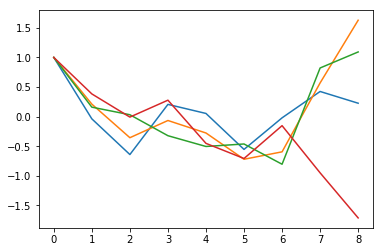

In [96]:
plt.plot(np.arange(9),xcorr)
plt.plot(xcorr2)
plt.plot(xcorr3)
plt.plot(xcorr4)